In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [43]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv('magic04.data', names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [44]:
tepri = df['class'].unique()
print(tepri)
print("G = Gamma H = Hadron")

['g' 'h']
G = Gamma H = Hadron


In [45]:
df['class'] = (df['class'] == 'g').astype(int)

In [46]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


## ...

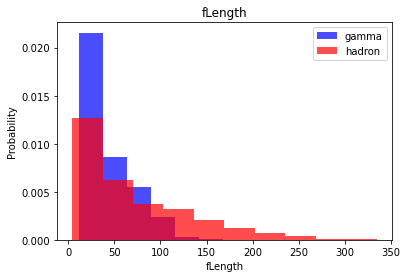

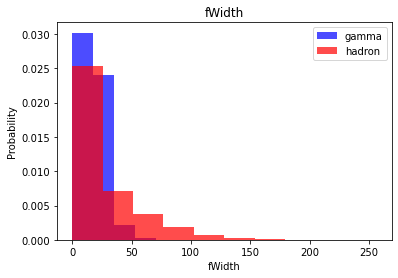

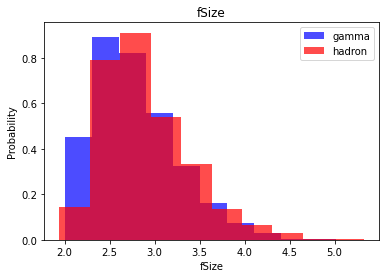

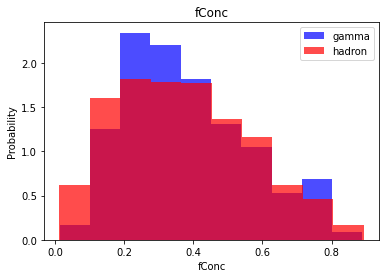

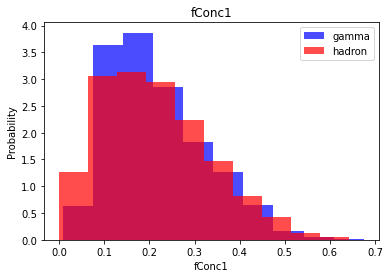

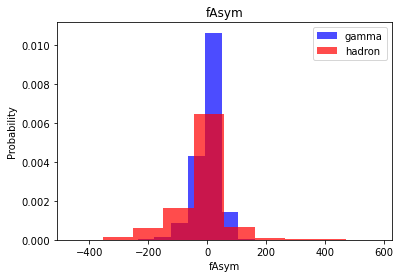

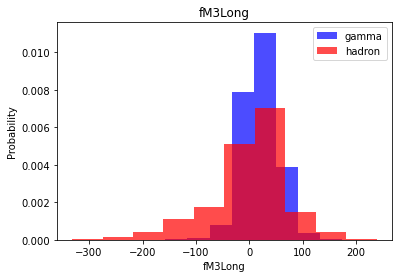

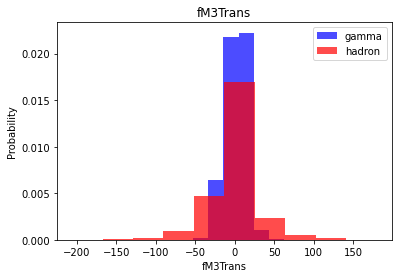

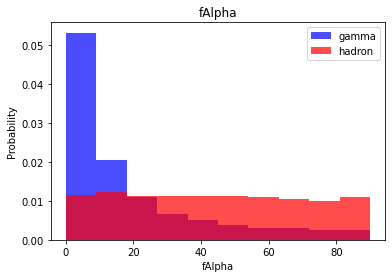

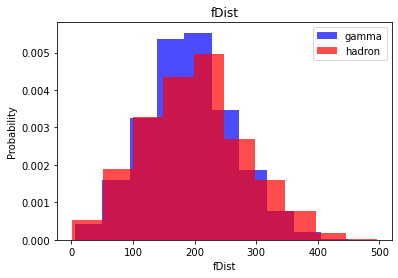

In [47]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color ='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color ='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()
    

## Train, Validation, test datasets

In [48]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [49]:
def scale_dataset(dataframe, oversample = False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [50]:
print(len(train[train["class"]==1])) # gamma
print(len(train[train["class"]==0])) # hadron

7430
3982


In [51]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=True)
test, X_test, y_test = scale_dataset(test, oversample=True)

In [52]:
len(y_train)

14860

## kNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [67]:
knn_model = KNeighborsClassifier(n_neighbors =5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
y_pred = knn_model.predict(X_test)

In [69]:
y_pred

array([1, 0, 1, ..., 1, 0, 0])

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78      2496
           1       0.75      0.86      0.81      2496

    accuracy                           0.79      4992
   macro avg       0.80      0.79      0.79      4992
weighted avg       0.80      0.79      0.79      4992



## Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [74]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.39      0.52      2496
           1       0.59      0.89      0.71      2496

    accuracy                           0.64      4992
   macro avg       0.69      0.64      0.62      4992
weighted avg       0.69      0.64      0.62      4992



## Log Regression

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))